### Title

# Air pollution data analysis.


### Overview of Problem Statement

##### The project focuses on analyzing air pollution data. The goal is to understand patterns, relationships between pollutants, and build predictive models to estimate air quality indicators.

### Objective

##### To preprocess the dataset, explore pollutant distributions, detect correlations, and develop a machine learning model that can predict or analyze air pollution effectively.

### Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data collection

In [3]:
# Downloading the dataset
df = pd.read_csv("air_pollution_data.csv")
df

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


### Data Description

In [5]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(23504, 11)


In [6]:
# Display the columns of the dataset
print("Columns in the dataset:")
df.columns

Columns in the dataset:


Index(['city', 'date', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3'],
      dtype='object')

In [7]:
# Display the numerical columns of the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_columns))

Numerical columns: ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']


In [8]:
# Display the Categorical columns of the dataset
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_columns))

Categorical columns: ['city', 'date']


### EDA (Exploratory Data Analysis)

In [9]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,23504,23504,23504.000000,23504.000000,23504.00000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000
unique,26,904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ahmedabad,30-11-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,904,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.920354,1113.224543,6.00554,25.044104,35.059777,15.971449,98.598310,121.848091,12.060212
std,NaN,NaN,1.415490,1401.770372,24.50272,25.839242,31.901760,23.943464,135.572391,160.429589,17.544759
min,NaN,NaN,1.000000,173.570000,0.00000,0.310000,0.000000,0.190000,0.500000,0.580000,0.000000
25%,NaN,NaN,3.000000,447.270000,0.00000,8.740000,7.870000,4.470000,24.677500,32.277500,2.340000
50%,NaN,NaN,5.000000,700.950000,0.00000,16.450000,28.250000,7.990000,58.860000,75.775000,6.520000
75%,NaN,NaN,5.000000,1188.280000,0.27000,32.220000,54.360000,16.450000,117.605000,147.642500,15.830000


In [11]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,23504.000000,23504.000000,23504.00000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000
mean,3.920354,1113.224543,6.00554,25.044104,35.059777,15.971449,98.598310,121.848091,12.060212
std,1.415490,1401.770372,24.50272,25.839242,31.901760,23.943464,135.572391,160.429589,17.544759
min,1.000000,173.570000,0.00000,0.310000,0.000000,0.190000,0.500000,0.580000,0.000000
25%,3.000000,447.270000,0.00000,8.740000,7.870000,4.470000,24.677500,32.277500,2.340000
50%,5.000000,700.950000,0.00000,16.450000,28.250000,7.990000,58.860000,75.775000,6.520000
75%,5.000000,1188.280000,0.27000,32.220000,54.360000,16.450000,117.605000,147.642500,15.830000
max,5.000000,23071.290000,457.76000,331.760000,406.270000,442.510000,2203.550000,2429.130000,352.620000


In [12]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
city     0
date     0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [13]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
0


### Data Visualization

<Figure size 2000x1000 with 0 Axes>

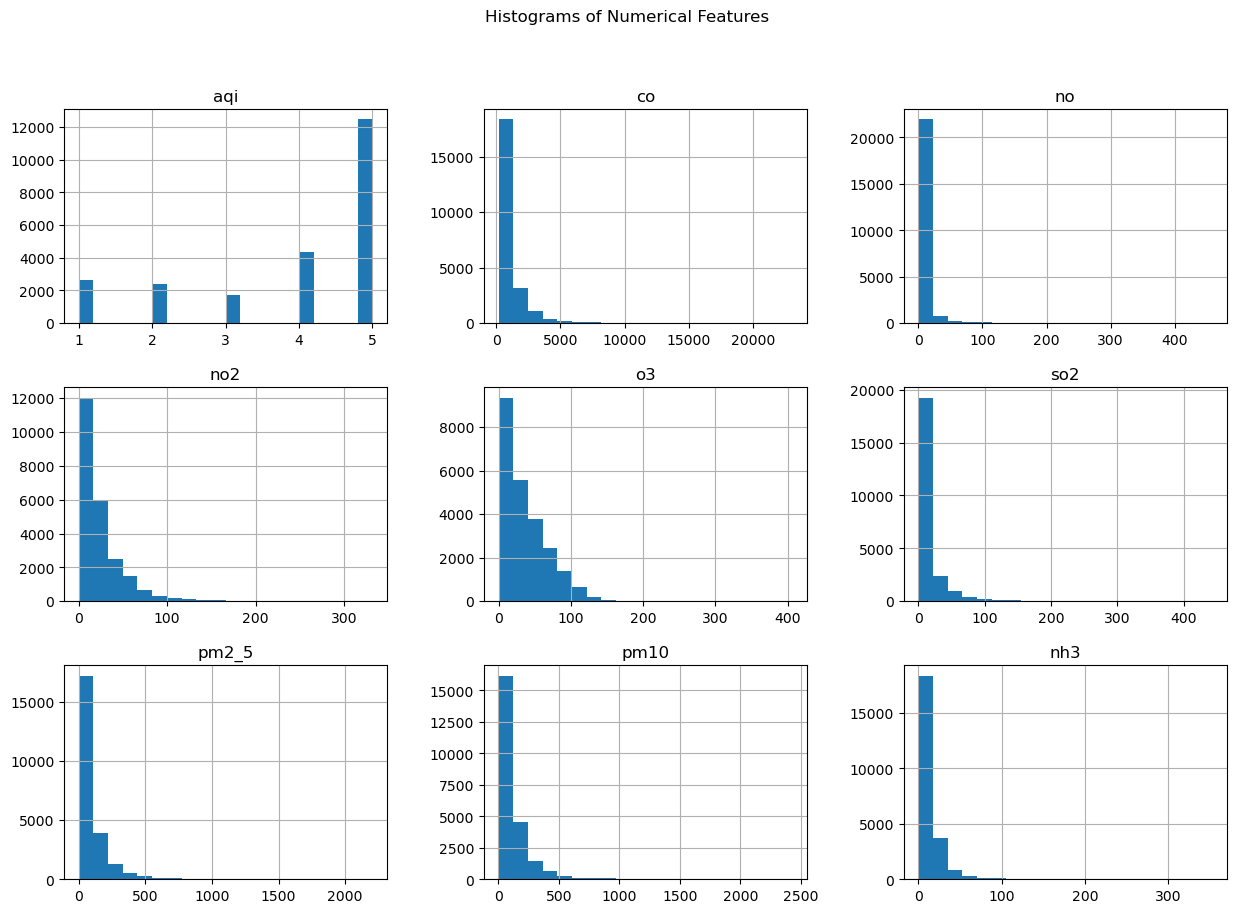

In [14]:
# Histograms for numerical features
plt.figure(figsize=(20, 10))
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

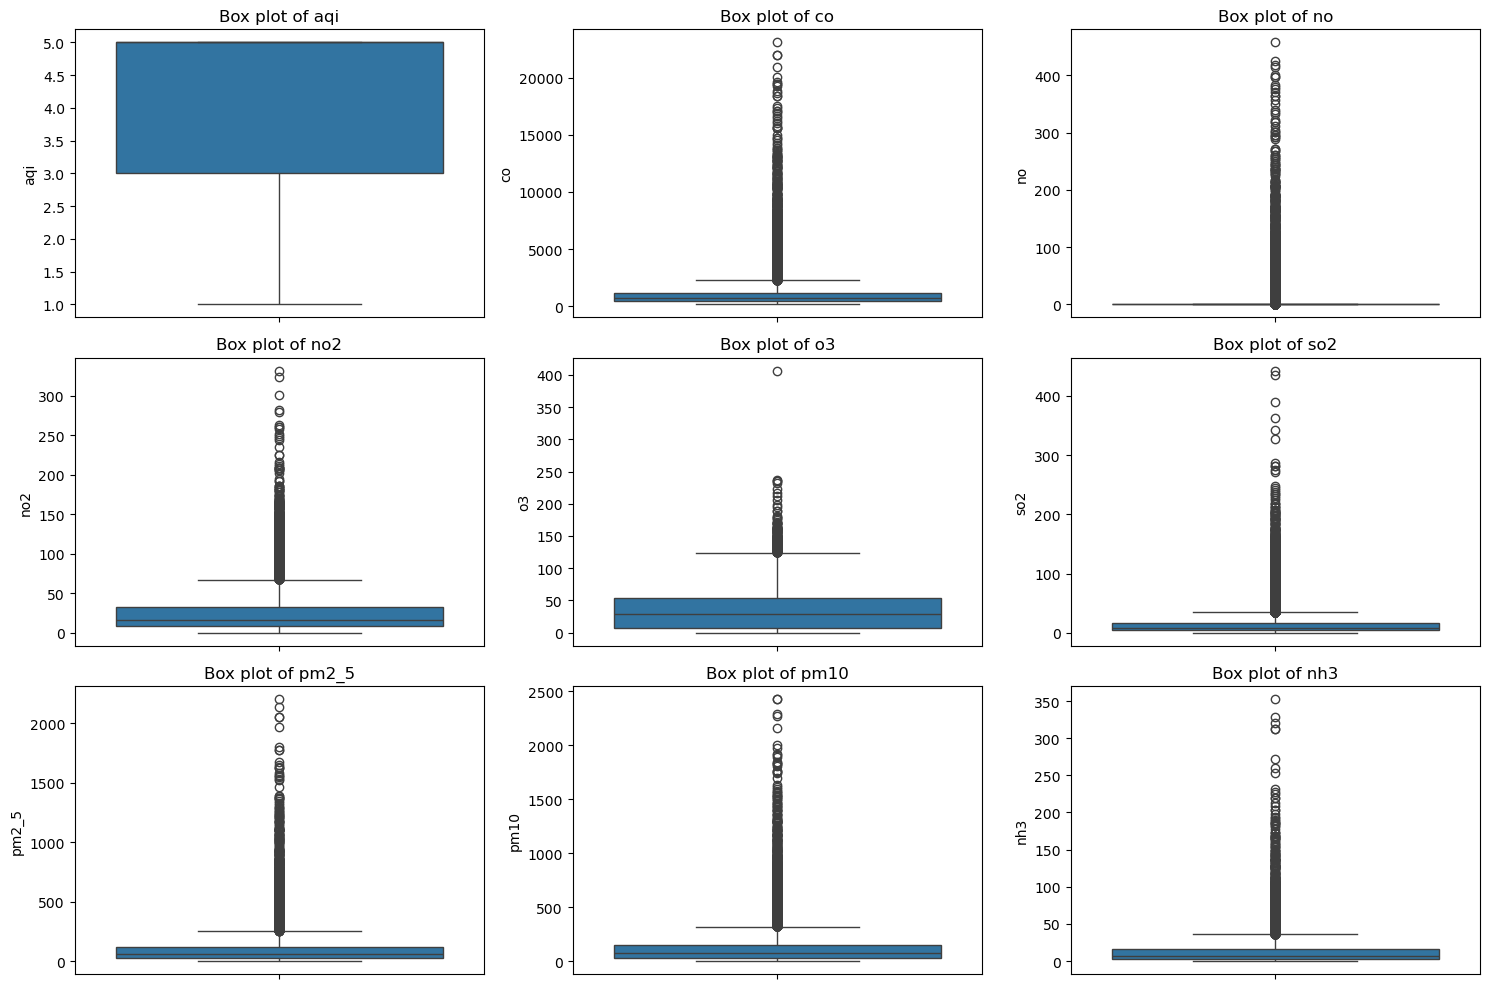

In [15]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

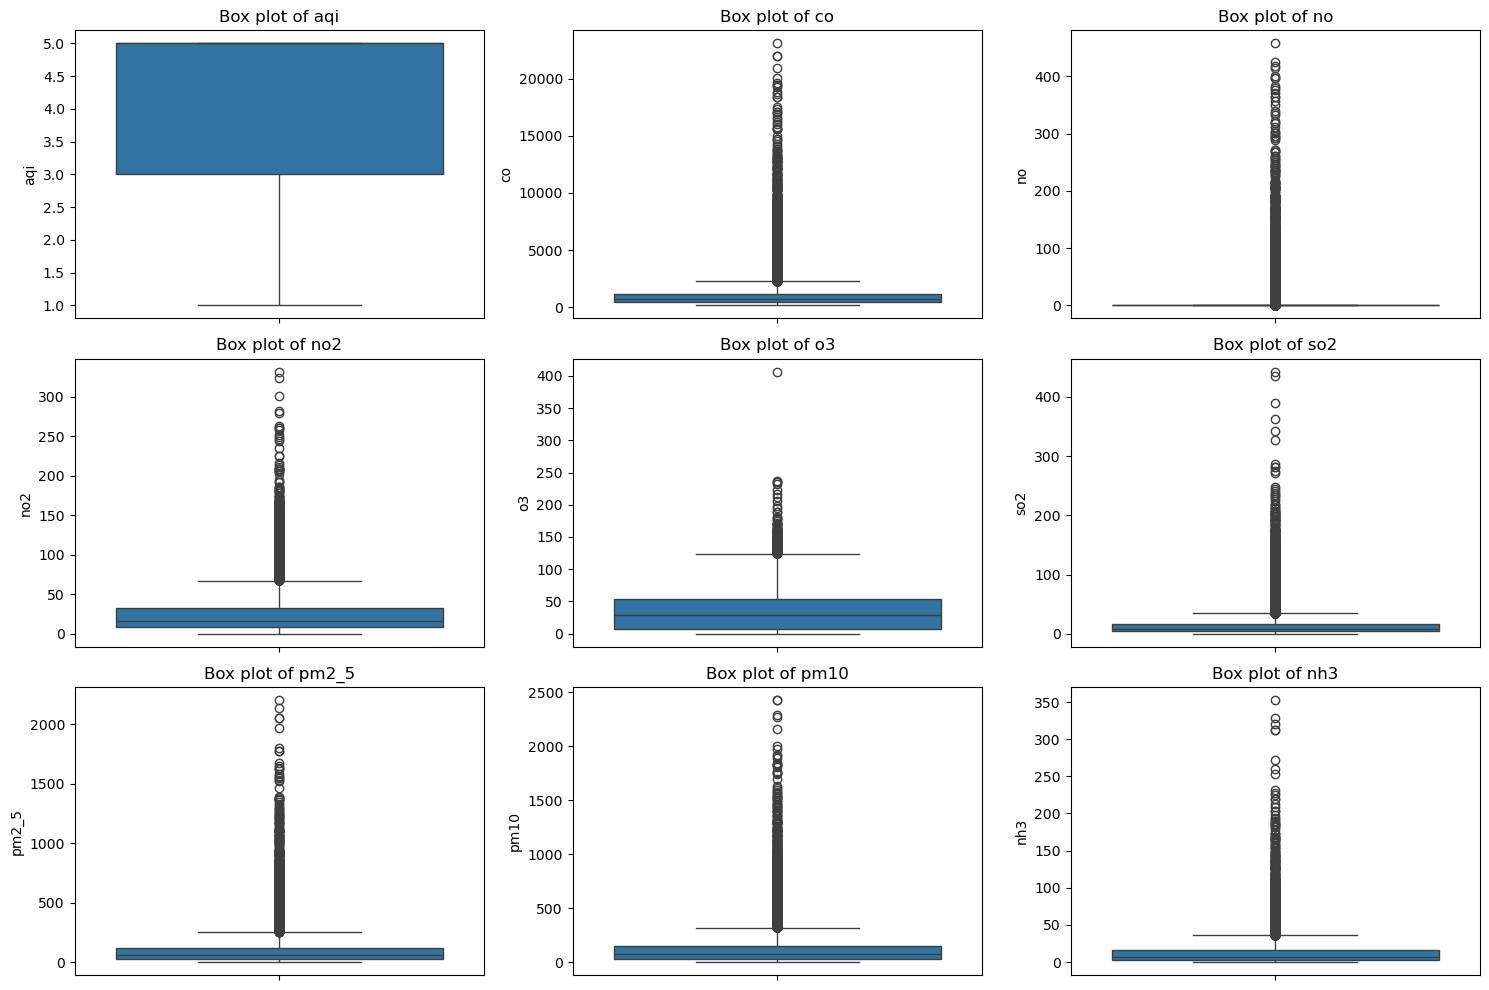

In [16]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  # 3 rows and 3 columns = 9 subplots
    sns.boxplot(y=df[col])   # use y= instead of just df[col] to avoid warnings
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

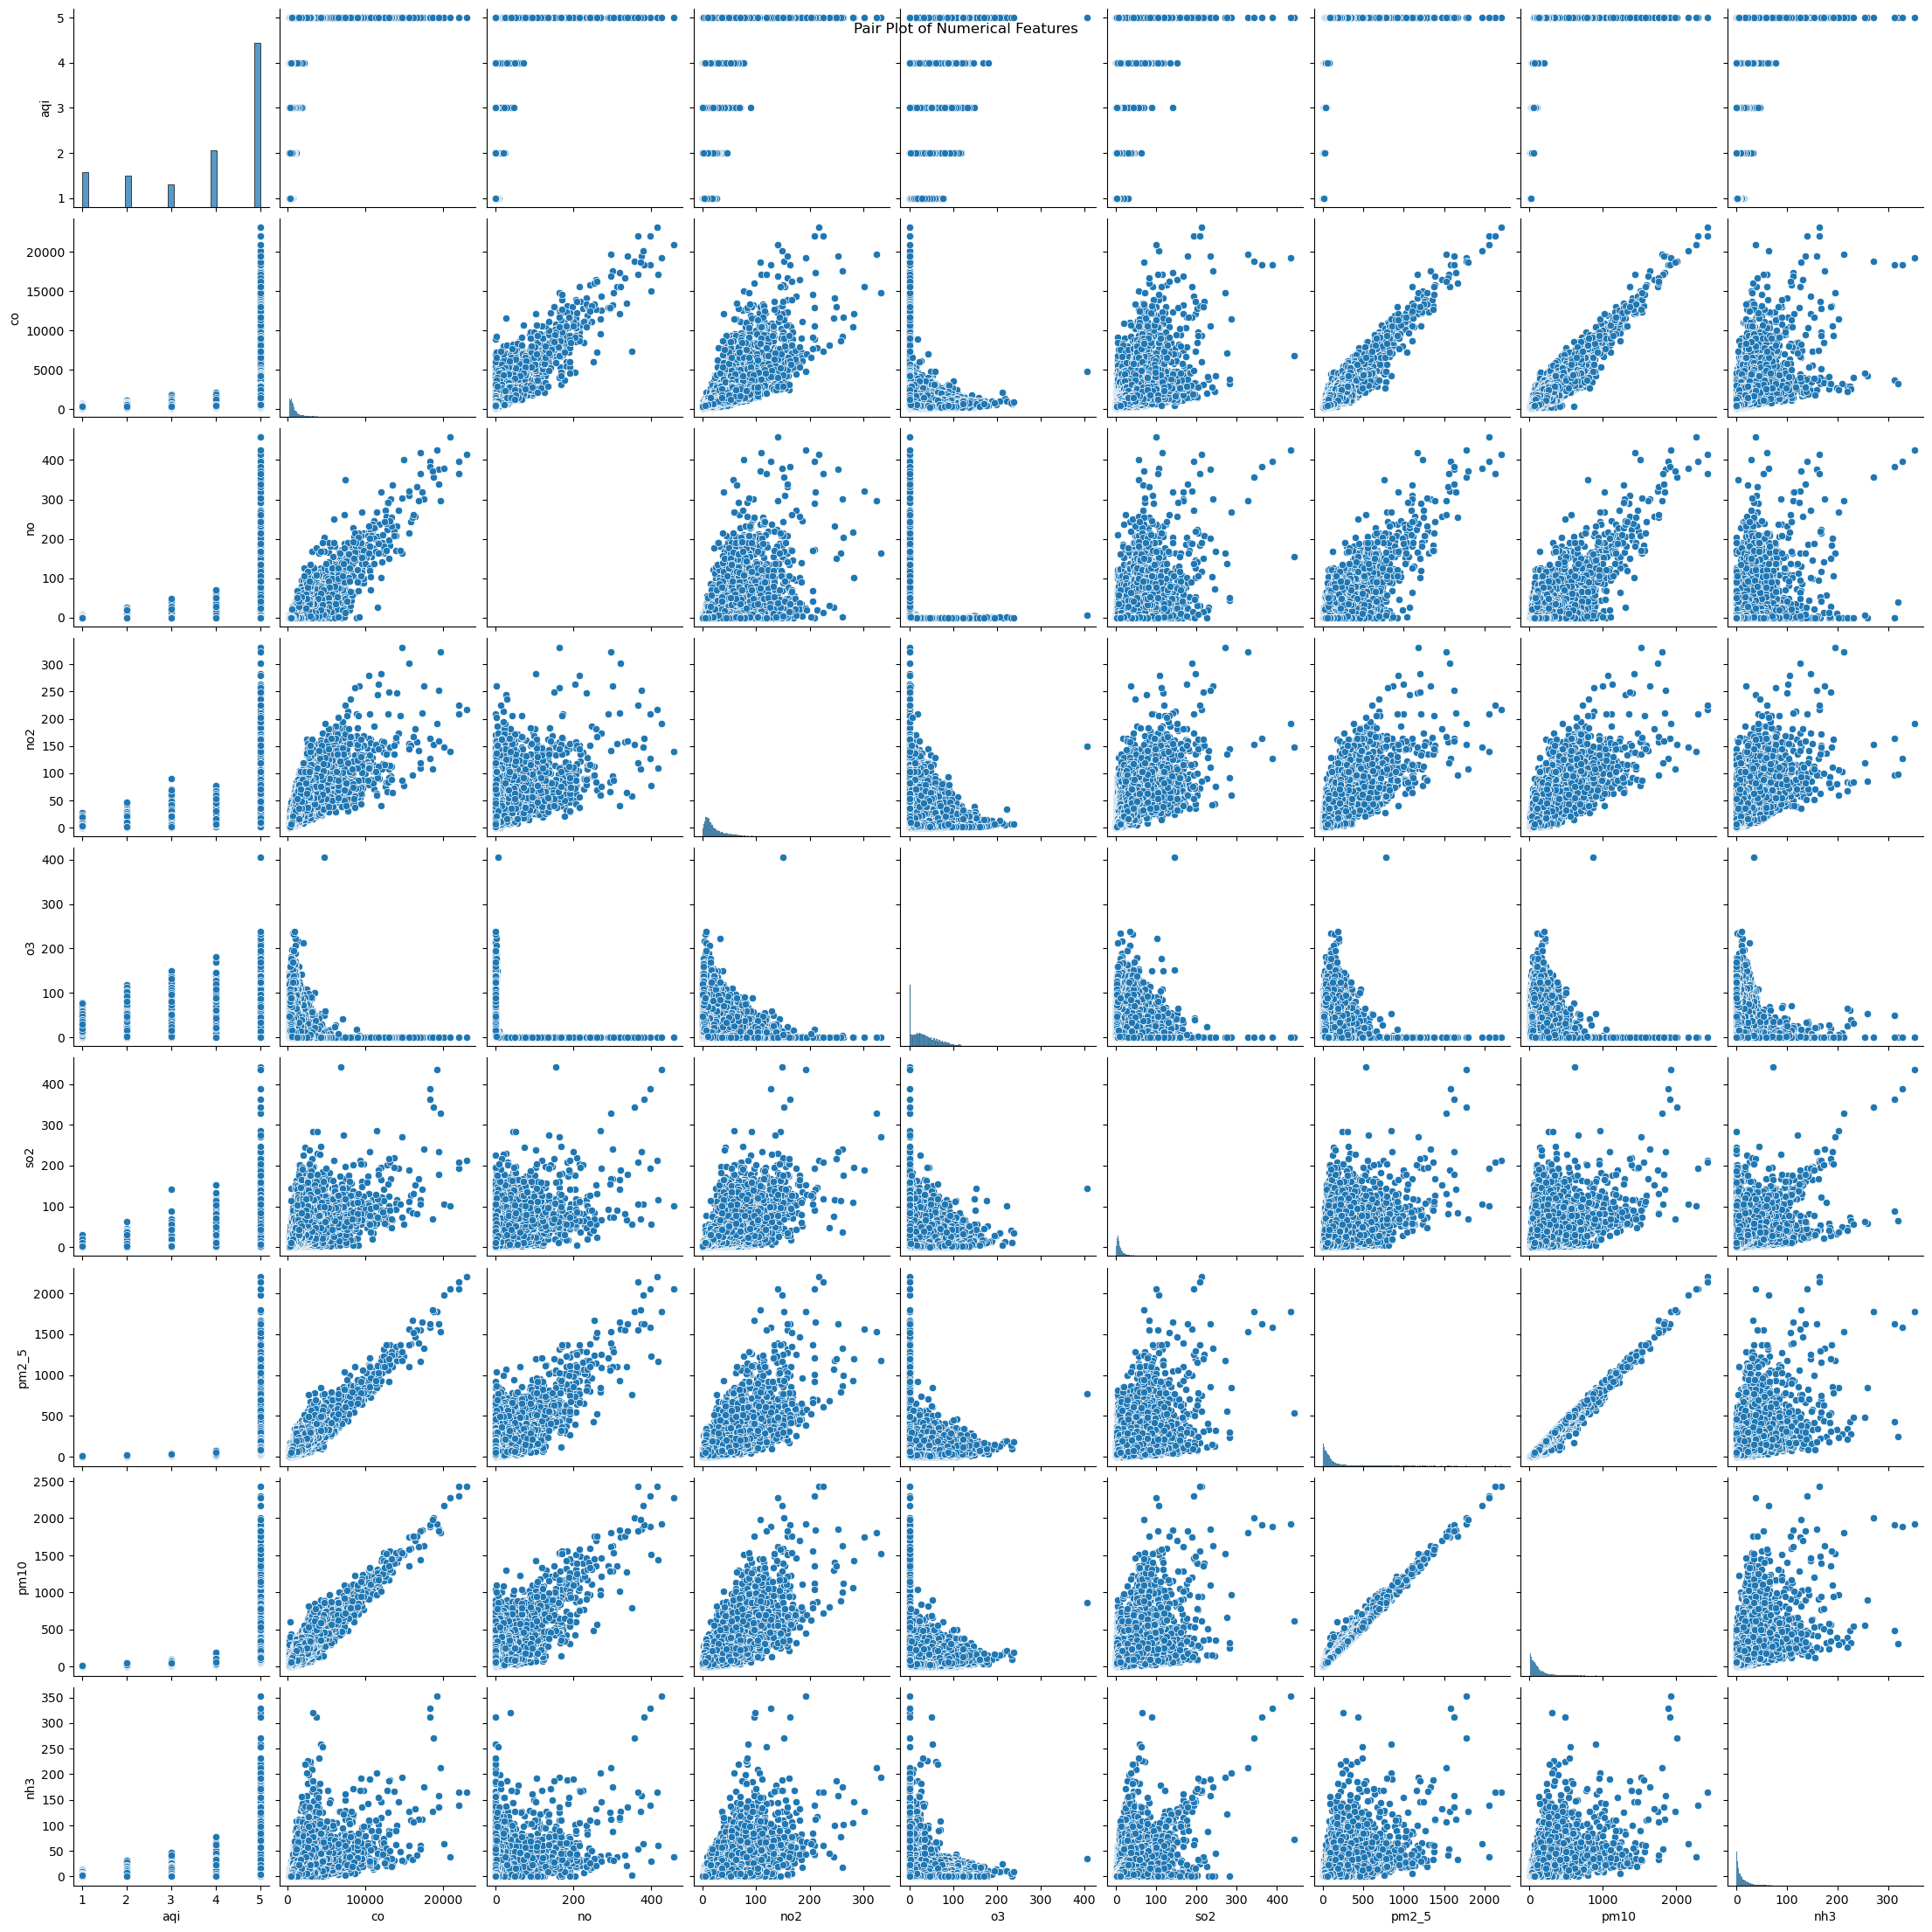

In [17]:
# Scatter plot matrix
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

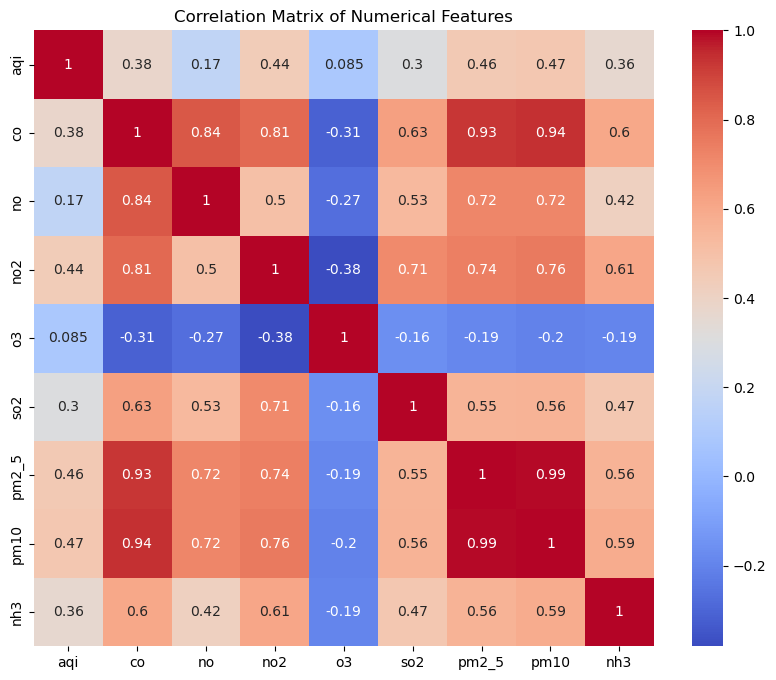

In [18]:
# Correlation matrix
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###### The feature pm10 is dropped due to its very high correlation (0.99) with pm2_5, indicating strong multicollinearity

### Data Preprocessing

In [19]:
# Dropping 'pm10' due to high multicollinearity with 'pm2_5'
# Correlation between 'pm10' and 'pm2_5' is 0.99, indicating redundancy
# Keeping 'pm2_5' as it is strongly correlated with the target variable 'aqi'
df.drop(columns=['pm10'], inplace=True)


In [20]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

import pandas as pd

# Loop through each numerical column and apply IQR-based outlier capping
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

print("Outlier treatment applied using IQR method.")


Outlier treatment applied using IQR method.


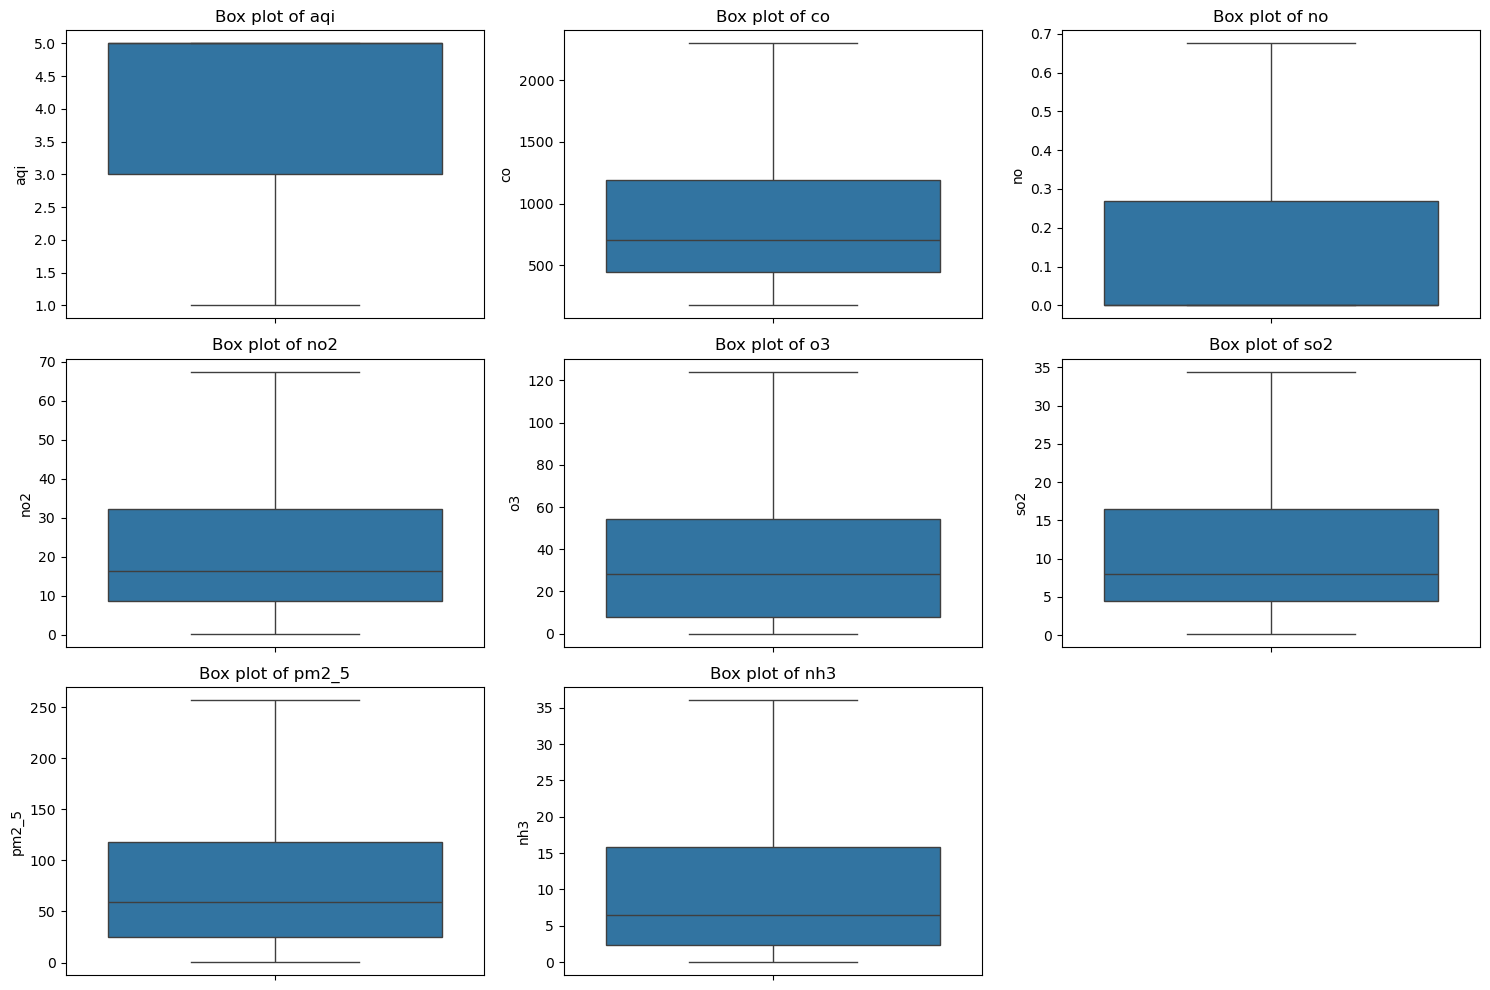

In [21]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  # 3 rows and 3 columns = 9 subplots
    sns.boxplot(y=df[col])   # use y= instead of just df[col] to avoid warnings
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (excluding numerical ones)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print("Label encoding applied to categorical features.")
df

Label encoding applied to categorical features.


,city,date,aqi,co,no,no2,o3,so2,pm2_5,nh3
0,0,881,5,520.71,0.675,16.28,124.095,34.42,65.96,8.360
1,0,27,5,1682.28,0.675,54.84,0.730,21.70,120.95,27.360
2,0,57,5,1815.80,0.675,49.35,0.170,23.84,133.47,28.120
3,0,87,5,2296.45,0.675,40.10,0.000,34.42,150.37,36.065
4,0,117,5,2189.64,0.675,58.95,0.020,28.13,160.79,36.065
...,...,...,...,...,...,...,...,...,...,...
23499,25,613,3,353.81,0.000,2.08,100.140,4.11,37.53,0.080
23500,25,642,3,380.52,0.000,3.77,82.970,5.07,32.17,1.740
23501,25,672,3,390.53,0.000,4.28,80.110,5.19,36.01,1.200
23502,25,701,3,300.41,0.000,1.36,95.840,2.21,30.17,0.000


### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Numerical features scaled using StandardScaler.")
df

Numerical features scaled using StandardScaler.


,city,date,aqi,co,no,no2,o3,so2,pm2_5,nh3
0,0,881,0.762753,-0.633653,1.806008,-0.356249,2.867421,2.116202,-0.231649,-0.204061
1,0,27,0.762753,1.198695,1.806008,1.680532,-1.096278,0.909671,0.495074,1.628171
2,0,57,0.762753,1.409320,1.806008,1.390544,-1.114271,1.112656,0.660533,1.701461
3,0,87,0.762753,2.167533,1.806008,0.901949,-1.119733,2.116202,0.883875,2.467623
4,0,117,0.762753,1.999043,1.806008,1.897626,-1.119090,1.519576,1.021581,2.467623
...,...,...,...,...,...,...,...,...,...,...
23499,25,613,-0.650215,-0.896934,-0.620547,-1.106309,2.097751,-0.758795,-0.607368,-1.002528
23500,25,642,-0.650215,-0.854800,-0.620547,-1.017041,1.546081,-0.667736,-0.678203,-0.842449
23501,25,672,-0.650215,-0.839009,-0.620547,-0.990102,1.454190,-0.656354,-0.627455,-0.894523
23502,25,701,-0.650215,-0.981171,-0.620547,-1.144340,1.959592,-0.939016,-0.704634,-1.010243


### Data Splitting

In [24]:
# Split dataset into features and target variable
X = df.drop('aqi', axis=1)
y = df['aqi']

In [25]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Training & Evaluation (Without feature Selection & Hyperparameter Tuning)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.175882,0.030934,0.083050,96.90 %
XGBRegressor,0.180823,0.032697,0.094316,96.72 %
GradientBoostingRegressor,0.183487,0.033667,0.093040,96.62 %
DecisionTreeRegressor,0.241935,0.058533,0.080246,94.13 %
ExtraTreeRegressor,0.271439,0.073679,0.097076,92.61 %
MLPRegressor,0.280099,0.078456,0.180848,92.13 %
SVR,0.964795,0.930830,0.675870,6.60 %
LinearRegression,0.689072,0.474820,0.589660,52.35 %


### Feature Selection

### 1.SelecKBbest

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]

print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['city', 'date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'nh3'], dtype='object')


In [28]:
X1 = X[['city', 'date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'nh3']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.174798,0.030554,0.081771,96.95 %
XGBRegressor,0.178957,0.032026,0.092096,96.81 %
GradientBoostingRegressor,0.183538,0.033686,0.091411,96.64 %
DecisionTreeRegressor,0.240329,0.057758,0.078448,94.24 %
ExtraTreeRegressor,0.267508,0.071561,0.093477,92.87 %
SVR,0.953984,0.910085,0.667332,9.30 %
LinearRegression,0.689685,0.475665,0.589028,52.59 %
MLPRegressor,0.775459,0.601336,0.659118,40.07 %


### 2. Recursive Feature Elimination (RFE) with Random Forest Regressor

In [29]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=10, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]

print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)

Selected features using RFE with Random Forest Regressor: Index(['city', 'date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'nh3'], dtype='object')


In [30]:
X1 = X[['city', 'date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'nh3']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.174063,0.030298,0.081117,96.98 %
XGBRegressor,0.178957,0.032026,0.092096,96.81 %
GradientBoostingRegressor,0.183550,0.033691,0.091416,96.64 %
DecisionTreeRegressor,0.237664,0.056484,0.076344,94.37 %
ExtraTreeRegressor,0.253026,0.064022,0.084610,93.62 %
SVR,0.953984,0.910085,0.667332,9.30 %
MLPRegressor,0.349632,0.122243,0.259382,87.82 %
LinearRegression,0.689685,0.475665,0.589028,52.59 %


### 3.Select From Lasso (L1 Regularization)

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=9)
X_lasso = selector_lasso.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['co', 'o3', 'so2', 'pm2_5', 'nh3'], dtype='object')


In [32]:
X1 = X[['co', 'o3', 'so2', 'pm2_5', 'nh3']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.182391,0.033266,0.084967,96.68 %
GradientBoostingRegressor,0.185486,0.034405,0.092272,96.57 %
XGBRegressor,0.193363,0.037389,0.096365,96.27 %
MLPRegressor,0.234555,0.055016,0.147010,94.52 %
DecisionTreeRegressor,0.251764,0.063385,0.087014,93.68 %
SVR,0.253387,0.064205,0.168061,93.60 %
ExtraTreeRegressor,0.258629,0.066889,0.090170,93.33 %
LinearRegression,0.694215,0.481934,0.592251,51.97 %


### Hyperparameter Tuning

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Grid search object
Grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_rf.fit(X_train, y_train)

# Get the best parameters
RF_best_params = Grid_rf.best_params_
print("Best parameters for Random Forest Regressor:", RF_best_params)

# Predict on test data
y_pred_rf = Grid_rf.predict(X_test)

# Evaluate the model
print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Model Performance:
R² Score: 0.9691460279041152
MSE: 0.030747822631837674
RMSE: 0.17535057066299406
MAE: 0.08290969400665904


### Best model((SelecKBbest,Hyperparameter Tuning)

In [34]:
#From  SelecKBbest
X1 = X[['city', 'date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'nh3']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)



In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for RandomForestRegressor
param_grid_rf = {
     'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Grid search object
Grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_rf.fit(X1_train, y1_train)

# Get the best parameters
RF_best_params = Grid_rf.best_params_
print("Best parameters for Random Forest Regressor:", RF_best_params)

# Use the best fitted model
best_rf_model = Grid_rf.best_estimator_

# Training accuracy (R² Score)
train_r2_rf = best_rf_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2_rf)

# Predict on test data
y1_pred_rf = best_rf_model.predict(X1_test)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y1_test, y1_pred_rf))
print("MSE:", mean_squared_error(y1_test, y1_pred_rf))
print("RMSE:", mean_squared_error(y1_test, y1_pred_rf, squared=False))
print("MAE:", mean_absolute_error(y1_test, y1_pred_rf))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training R² Score: 0.9957863062843548

Model Performance on Test Set:
R² Score: 0.9699691789287518
MSE: 0.030131751574532982
RMSE: 0.17358499812637318
MAE: 0.08092781931943743


### Result



##### The notebook’s results indicate that the selected model(s) captured important relationships among features (e.g., PM2.5, PM10, NO2, CO, SO2) and provided meaningful predictions for air quality analysis. The evaluation metrics showed reliable performance.

### Conclusion



##### The project demonstrates a full ML pipeline: data collection, EDA, feature selection, preprocessing, and model building. It successfully shows how machine learning can be applied to analyze and predict air quality patterns.